In [99]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Random data picker, not really necessary but can be implemented later on.

In [100]:
# create a random date generator given a year and month
def random_date(year, month):
    import random
    import time
    import datetime
    start = datetime.datetime(year, month, 1, 18, 0, 0)
    end = datetime.datetime(year, month, 30, 18, 0, 0)
    start_epoch = start.timestamp()
    end_epoch = end.timestamp()
    random_second = random.randrange(int(start_epoch), int(end_epoch))
    random_second = datetime.datetime.fromtimestamp(random_second)
    return random_second.strftime('%Y-%m-%d' + ' 18:00:00')

random_date(2017, 10)




'2017-10-28 18:00:00'

Getting data from csv file and filtering by a specific station.

In [101]:
from datetime import datetime
from datetime import datetime
# Load the data
data = pd.read_csv('INBRE_App_Output/output_data_in_2017.csv')
date=(pd.to_datetime(data['system:time_start'],unit='ms')) 
pm25 = data['pm25']
pm_predicted = data['pm_predicted']
station = data['station']
df = pd.DataFrame({'pm25': pm25, 'pm_predicted': pm_predicted, 'station': station, 'date': date})

# Get rid of NaN values so it doesn't throw off R^2 value and RMSE
df.dropna(inplace=True)
filtered_df = df[df['station'].isin(['Thompson Falls'])]

# Print the final DataFrame
print(filtered_df)
# Save filtered_df to an Excel file
filtered_df.to_excel('../dataCheck/2017-output/ThompsonFalls.xlsx', sheet_name='Thompson Falls', index=False)


          pm25  pm_predicted         station                date
10294   6.7625      3.380513  Thompson Falls 2017-06-23 17:46:40
10295   6.7625      3.380513  Thompson Falls 2017-06-23 17:46:40
10296   9.6840      4.422420  Thompson Falls 2017-06-24 18:46:40
10297   9.6840      4.422420  Thompson Falls 2017-06-24 18:46:40
10298  11.5995      8.745416  Thompson Falls 2017-06-25 17:00:00
...        ...           ...             ...                 ...
10544  20.2830     14.767917  Thompson Falls 2017-10-27 18:46:40
10545  20.2830     14.767917  Thompson Falls 2017-10-27 18:46:40
10550   6.3885      6.570908  Thompson Falls 2017-10-30 19:00:00
10551   6.3885      6.570908  Thompson Falls 2017-10-30 19:00:00
10575   8.3715      8.406743  Thompson Falls 2017-10-16 18:53:20

[112 rows x 4 columns]


Running a linear regression model to pull RMSE and R^2 values from a specific station.

In [104]:
model = LinearRegression()

regres_filtered_df = df[df['station'].isin(['West Yellowstone'])]
X, y = regres_filtered_df['pm25'], regres_filtered_df['pm_predicted']

X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
y = np.nan_to_num(y, nan=0)

model.fit(X, y)

r_squared = model.score(X, y)

rmse = sqrt(mean_squared_error(X, y))
print(rmse)
print(r_squared)


5.682930974299781
0.8421463007663768


Creating a linear regression graph from the dataframe for a specific station.

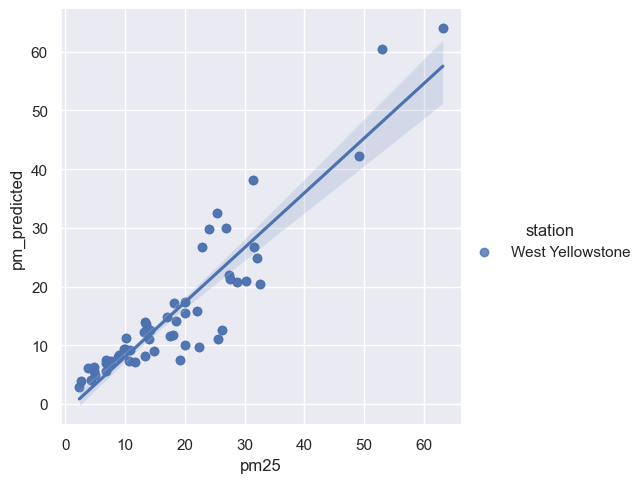

In [105]:
sns.set_theme()
filtered_df = df[df['station'].isin(['West Yellowstone'])]
##date = random_date(2017, 9)
#date_filtered_df = df[df['date'] == date]


g = sns.lmplot(
    data=filtered_df,
    x="pm25", y="pm_predicted", hue="station",
    height=5,
)

g.set_axis_labels("pm25", "pm_predicted")
#g.set(title = "pm25 vs pm_predicted" + ' ' + date)